Exploratory Data Analysis: Melbourne Housing Dataset


Need to first read in the file and add imports to libraries we will be using.

In [155]:
#   Imports for data manipulation
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [156]:
df = pd.read_csv('Melbourne_housing.csv')

/tmp/ipykernel_5220/1901315617.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Melbourne_housing.csv')


In [157]:
#Show all columns
pd.set_option('display.max_columns', None)

#Change format of price for better understanding
pd.options.display.float_format = '{:.4f}'.format


Lets look at the shape of the dataframe. Can see there are 34857 rows and 22 columns.

In [158]:
df.shape

(34857, 22)

Lets look at the first 5 rows of the dataframe. Can see a mix of categorical and numerical data. Can also see a NaN value in the first five rows. This
tells me there are likely a lot of NaN values in the dataset as can already see one in the first five rows. Can also see inf values which must be because BuildingArea is not float need to change.

In [159]:
# Shows first five rows of the dataframe
df.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5000,3067.0000,2.0000,1.0000,1.0000,126.0000,inf,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0000,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5000,3042.0000,3.0000,2.0000,1.0000,303.0000,225,2016.0000,Moonee Valley City Council,-37.7180,144.8780,Western Metropolitan,3464.0000,Detached Garage,840000.0000
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3000,3206.0000,2.0000,1.0000,0.0000,120.0000,82,1900.0000,Port Phillip City Council,-37.8459,144.9555,Southern Metropolitan,3280.0000,Attached Garage,1275000.0000
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3000,3206.0000,2.0000,1.0000,0.0000,159.0000,inf,NaN,Port Phillip City Council,-37.8450,144.9538,Southern Metropolitan,3280.0000,Indoor,1455000.0000
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4000,3078.0000,3.0000,2.0000,1.0000,174.0000,122,2003.0000,Darebin City Council,-37.7818,145.0198,Northern Metropolitan,2211.0000,Parkade,NaN


Lets look at all the attributes of the data. 

In [160]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Latitude', 'Longtitude',
       'Regionname', 'Propertycount', 'ParkingArea', 'Price'],
      dtype='object')

Can see a lot of this datasets features are of type object. Would probably be best to change some of them to something more useful or efficient like the categorical datatype in feature engineering. Postcode should be changed to categorical and BuildingArea to float64

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Method         34857 non-null  object 
 5   SellerG        34857 non-null  object 
 6   Date           34857 non-null  object 
 7   Distance       34856 non-null  float64
 8   Postcode       34856 non-null  float64
 9   Bedroom        26640 non-null  float64
 10  Bathroom       26631 non-null  float64
 11  Car            26129 non-null  float64
 12  Landsize       23047 non-null  float64
 13  BuildingArea   13760 non-null  object 
 14  YearBuilt      15551 non-null  float64
 15  CouncilArea    34854 non-null  object 
 16  Latitude       26881 non-null  float64
 17  Longtitude     26881 non-null  float64
 18  Region

Can see some statistics for the float features below. Can see a lot of features such as Bedroom have a significantly smaller count then others such as Landsize. This is another hint at null values.
Can see a big range and variance in a lot of features such as Price, Bedrooms and Landsize. Need to visualize first before dealing with outliers. Can also see the max YearBuilt is the year 2106 and max rooms is 16 but max bedrooms is 30, which tells me this was either a mistake or this dataset captures possible future house data, need to analyze more. Can see BuildingArea has 0 values. Date should be of type datetime just to make it easier to manage.

In [162]:
# Change buildingarea to float64
# Replace inf with nan for now
df['BuildingArea'] = pd.to_numeric(df['BuildingArea'], errors='coerce')
df['BuildingArea'] = df['BuildingArea'].replace(np.inf, np.nan)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.describe()

,Rooms,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longtitude,Propertycount,Price
count,34857.0000,34857,34856.0000,34856.0000,26640.0000,26631.0000,26129.0000,23047.0000,13742.0000,15551.0000,26881.0000,26881.0000,34854.0000,27247.0000
mean,3.0310,2017-05-23 11:01:38.838109696,11.1849,3116.0629,3.0846,1.6248,1.7288,593.5990,160.2564,1965.2899,-37.8106,145.0019,7572.8883,1050173.3450
min,1.0000,2016-01-28 00:00:00,0.0000,3000.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1196.0000,-38.1904,144.4238,83.0000,85000.0000
25%,2.0000,2016-11-19 00:00:00,6.4000,3051.0000,2.0000,1.0000,1.0000,224.0000,102.0000,1940.0000,-37.8629,144.9335,4385.0000,635000.0000
50%,3.0000,2017-07-08 00:00:00,10.3000,3103.0000,3.0000,2.0000,2.0000,521.0000,136.0000,1970.0000,-37.8076,145.0078,6763.0000,870000.0000
75%,4.0000,2017-10-28 00:00:00,14.0000,3156.0000,4.0000,2.0000,2.0000,670.0000,188.0000,2000.0000,-37.7541,145.0719,10412.0000,1295000.0000
max,16.0000,2018-03-17 00:00:00,48.1000,3978.0000,30.0000,12.0000,26.0000,433014.0000,44515.0000,2106.0000,-37.3902,145.5264,21650.0000,11200000.0000
std,0.9699,NaN,6.7889,109.0239,0.9807,0.7242,1.0108,3398.8419,401.2671,37.3282,0.0903,0.1202,4428.0903,641467.1301


Can see large proportion of null values in bedroom, bathroom, car, landsize, etc. Deletion of rows would give too much loss of information. Best to fill with mean/mode of feature until further analysis can determine whether or not it is a good idea to remove a column. Features such as distance, postcode and property count, removing the rows would not effect the distribution of the features in such a large sample size.

In [163]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Latitude          7976
Longtitude        7976
Regionname           0
Propertycount        3
ParkingArea          0
Price             7610
dtype: int64

Price is the target variable in this dataframe. Can see price has a pretty big standerd deviation and range hinting at possible outliers. 

In [164]:
df.Price.describe()

count      27247.0000
mean     1050173.3450
std       641467.1301
min        85000.0000
25%       635000.0000
50%       870000.0000
75%      1295000.0000
max     11200000.0000
Name: Price, dtype: float64

Lets have a look at the distrbution of price. Can see price is roughly normally distributed with some outliers above 0.4+e7 that are skewing it. With std = 641467.1301 and mean = 1050173.3450

/tmp/ipykernel_5220/138925950.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'], kde = False)


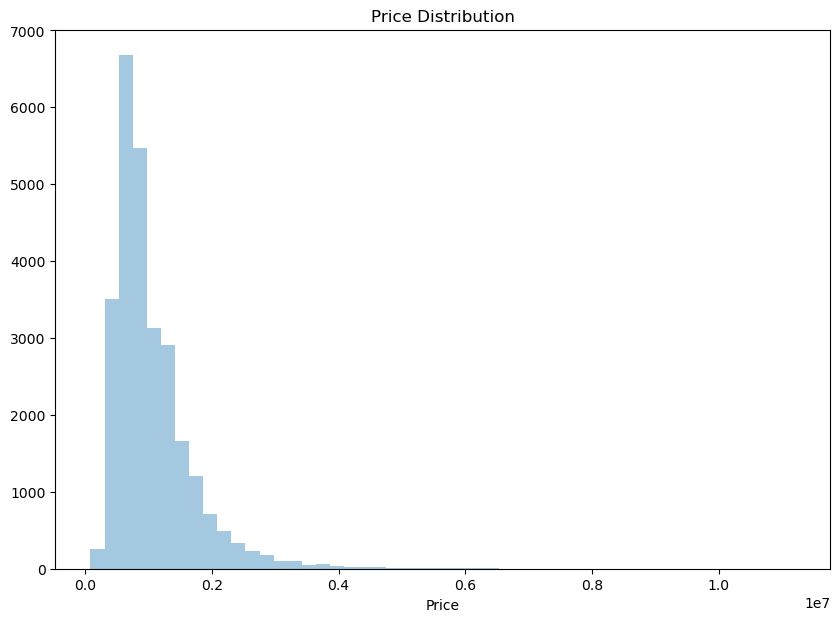

In [165]:
plt.figure(figsize=(10,7))
sns.distplot(df['Price'], kde = False)
plt.title('Price Distribution')
plt.show()

Exploratory data analysis:

Lets have a look at distrbution of numerical data and potentially spot outliers.
Can see a few things from the below histogarms.
1. All the data is somewhat normally distributed which is nice.
2. Distance is skewed left.
3. Seems to hint at some similarity between Bedrooms, Bathrooms and Cars as distributions very similar, which makes sense. Need to see scatter plot and heatmap to justify correlation.
4. Seems to be an Outlier in room feature of 16 and bedroom feature of 30 and 0, also in Bathroom at 12 and 0. Based on the max and min seen above.
5. The Landsize seems to have a lot of 0 value of 433010 is probably a mistake. BuildingArea also has a similar outlier of 44515.
6. The values with YearBuilt in 2100s and around 1200s are probably mistakes and should be removed.
7. The ranges of the longitude and latitude are pretty small which makes sense.
8. Building area and landsize are highly skewed to the left.

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Postcode'}>],
       [<Axes: title={'center': 'Bedroom'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>],
       [<Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longtitude'}>],
       [<Axes: title={'center': 'Propertycount'}>,
        <Axes: title={'center': 'Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

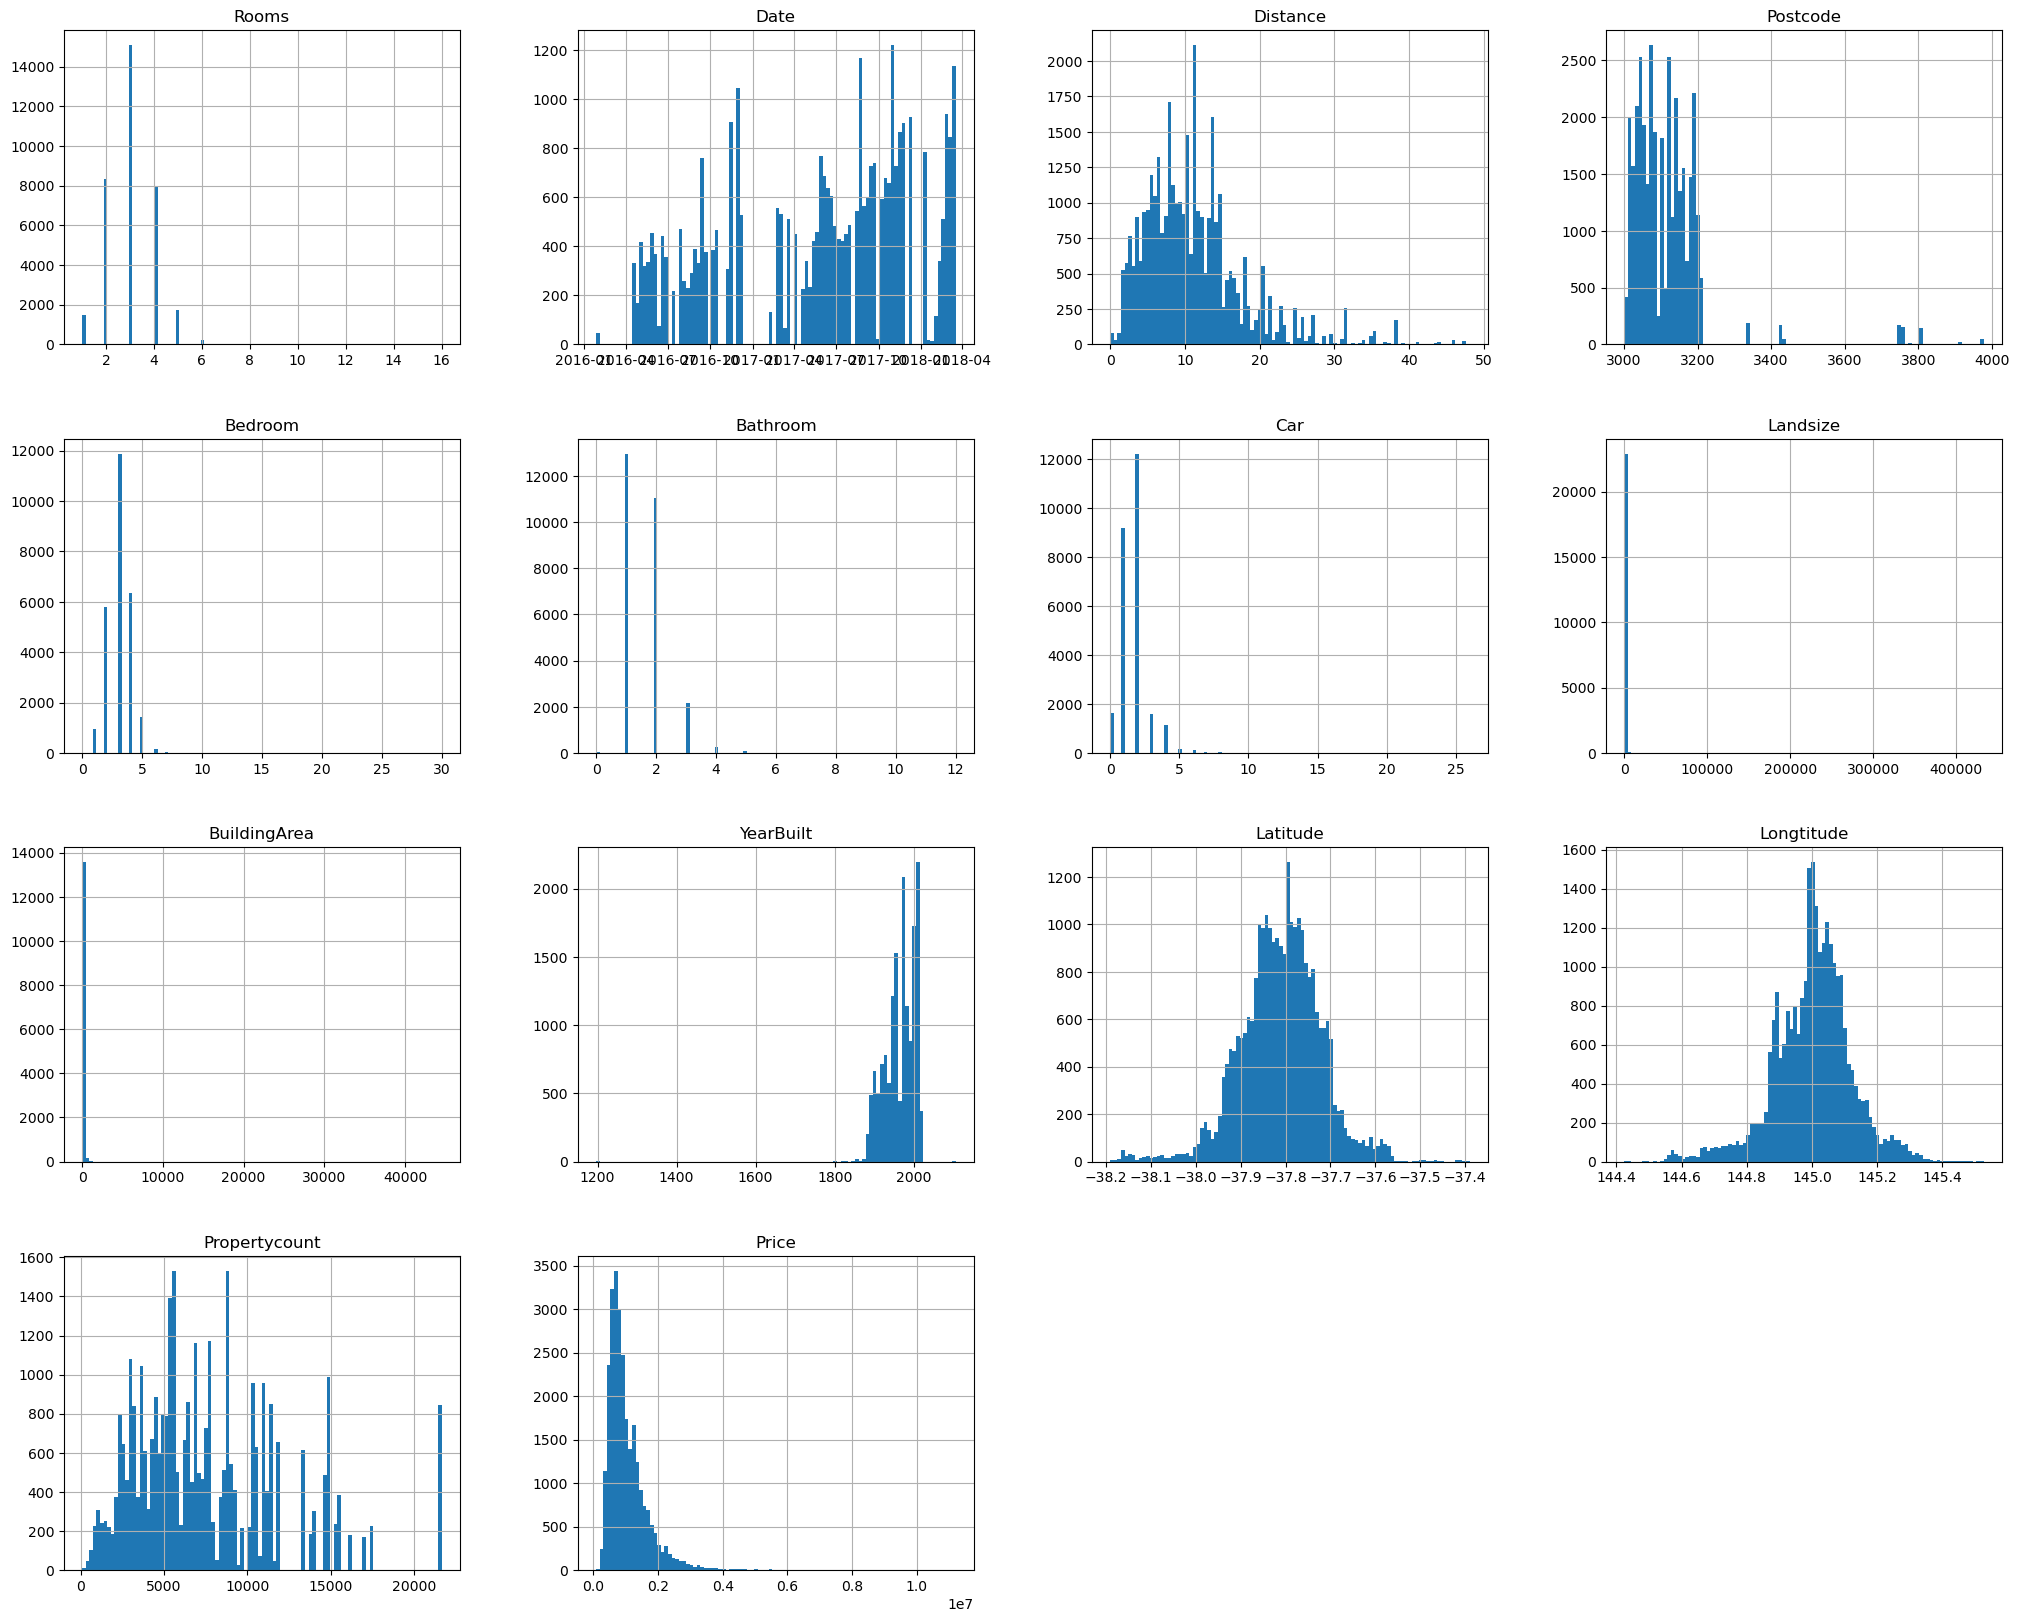

In [166]:
df.hist(figsize=(25,20), bins=100)

Boxplots will help spot outliers easier
Can see a lot from the boxplots of the numeric values:
1. Rooms:Can see 50% of houses have between 2-4 rooms. Data has outliers with 8 or more rooms. Median of about 3 rooms.
2. Distance:50% of houses are between about 5-15km from city. A lot of outliers greater then about 25km from city. Median around 10km from city.
3. Bedroom:50% of houses have between about 3-4 bedrooms. A few of outliers with more then 5 bedrooms. Median around 3 bedrooms.
4. Bathroom:50% between 1-2 bathrooms. A few outliers with 4 or more bathrooms. Median 2 bathrooms.
5. Car:50% between 1-2 cars. Many outliers have more then 3 cars. Median 2 cars.
6. Landsize:close to 50% seemingly have 0 landsize (possible a few hundred m^2 due to scaling hiding information in boxplot because of really high outlier) possibly apartments or terrace houses. A lot of outliers greater then a few hundred m^2. Median close to 0(hard to tell).
7. BuildingArea:Similar to landsize.
8. YearBuilt:50% between late 1900s and early 2000s. A few outliers some in 1800s,2 other outliers, one in 2100s and other in 1200s. Median about 1980s.
9. Latitude:50% between -37.75 and -37.85 degrees. Many outliers. Median about 37.8 degrees.
10. Longitude:median about 145 degrees.
11. PropertyCount:50% between 4900 and 10100. Outlier greater then 20000. Median about 7000.
12. Price:50% between 0.05+e7 and 0.15+e7 which is about 500,000 and 1.5 mill. Median around 1 million. Many outliers greater then 2 million.
    

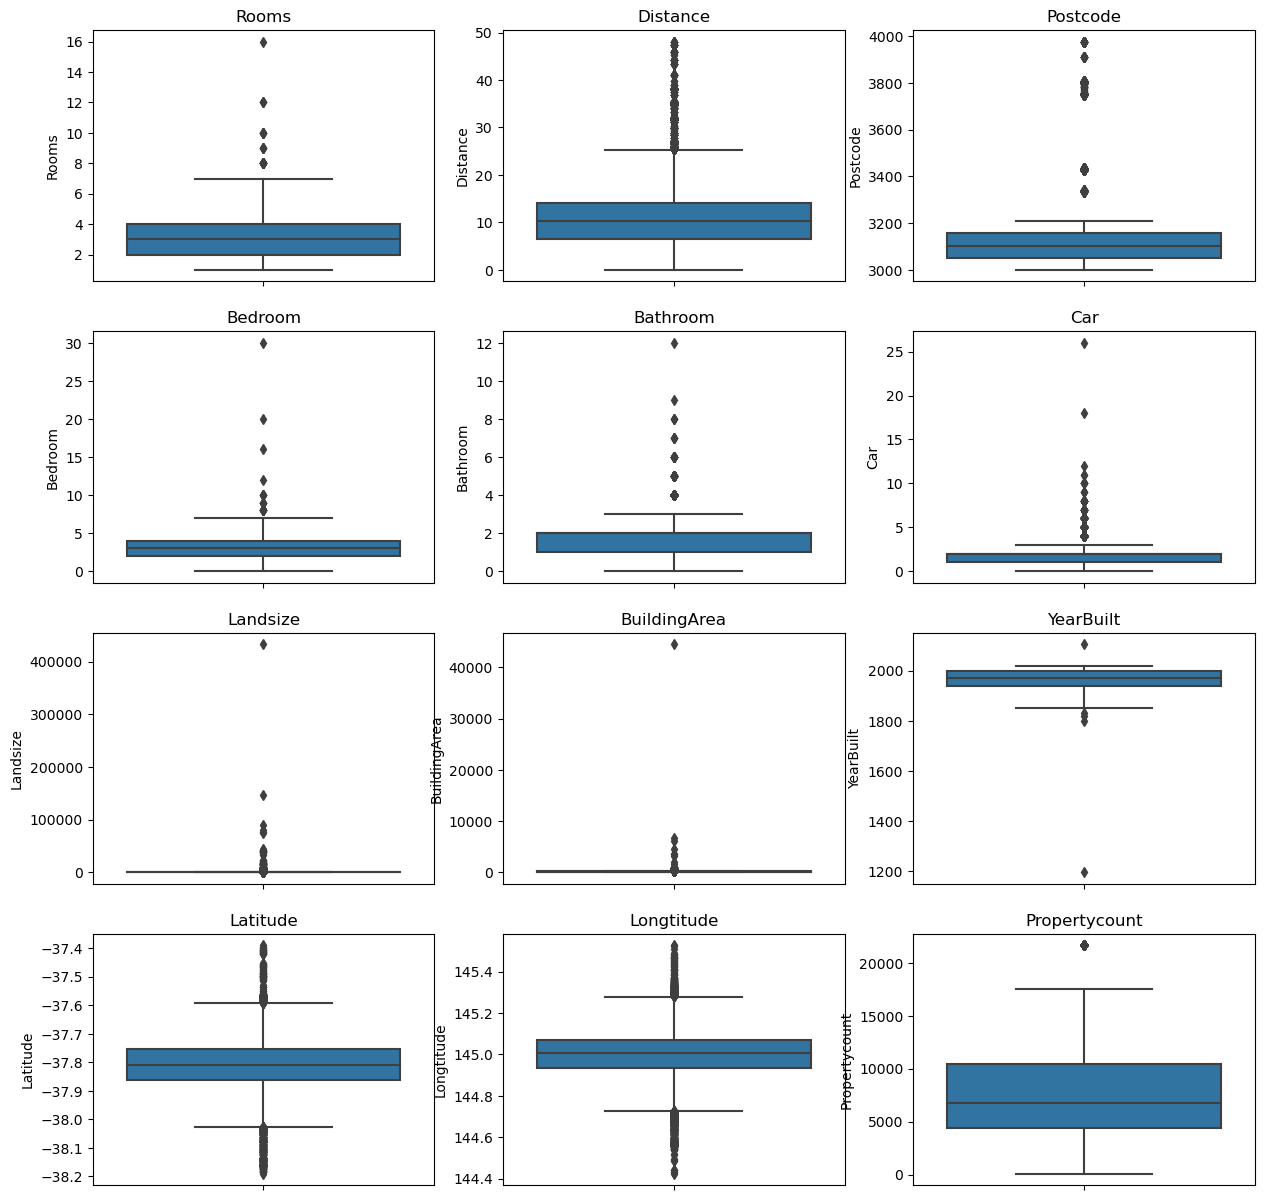

In [167]:
f, axes = plt.subplots(4,3, figsize = (15,15))

numeric_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()

k = 0
for i in range(0,4):
    for j in range(0,3):
        sns.boxplot(data = df, y = numeric_cols[k], ax = axes[i,j])
        axes[i,j].set_ylabel(numeric_cols[k])
        axes[i,j].set_title(numeric_cols[k])
        k+=1


plt.show()


Scatter plot of data vs price can tell us a lot about the target variable and its relationships with other data.
Numeric Data vs price:

1. Slight positive correlation with Price v Rooms but not as big as expected. Possibly due to many being high-end apartments. This can be seen in Price v Distance where many of the expensive houses are less then 20km from city.
2. As seen negative correlation between price and distance.
3. Most expensive houses have between 3-6 bedrooms.
4. The low price of the house with 20 bedrooms gives more reason to believe this was a mistake.
5. House with 18 cars is probably a mistake too.
6. Houses with over 40000 m^2 BuildingArea and 400000m^2 Landsize are very extreme outliers and should be removed.
7. Seems to be no correlation between price and year built. outlier in 1200s should go.    


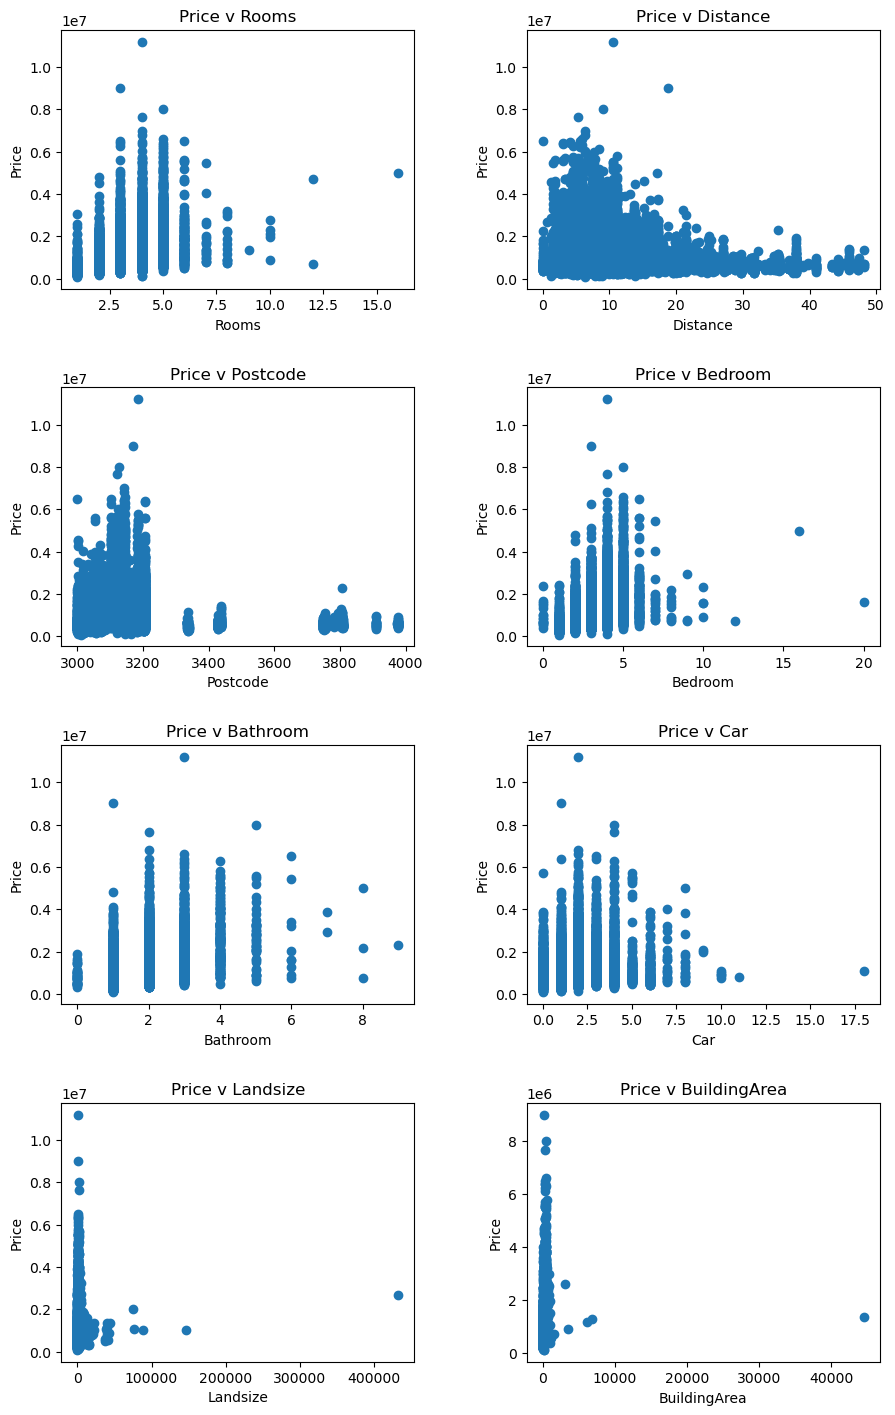

In [168]:
f, axes = plt.subplots(4,2, figsize = (10,15))
f.tight_layout(pad=5.0)

numeric_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()

k = 0
for i in range(0,4):
    for j in range(0,2):
        axes[i,j].scatter(x = numeric_cols[k], y = 'Price', data = df)
        axes[i,j].set_xlabel(numeric_cols[k])
        axes[i,j].set_ylabel('Price')
        axes[i,j].set_title('Price v '+numeric_cols[k])
        k+=1


Can see a few things from the below scatter plots:
1. No real correlation between garage and price.
2. Type h houses tend to be most expensive.
3. Most houses tend to be between 3000 and 3200 postcode.

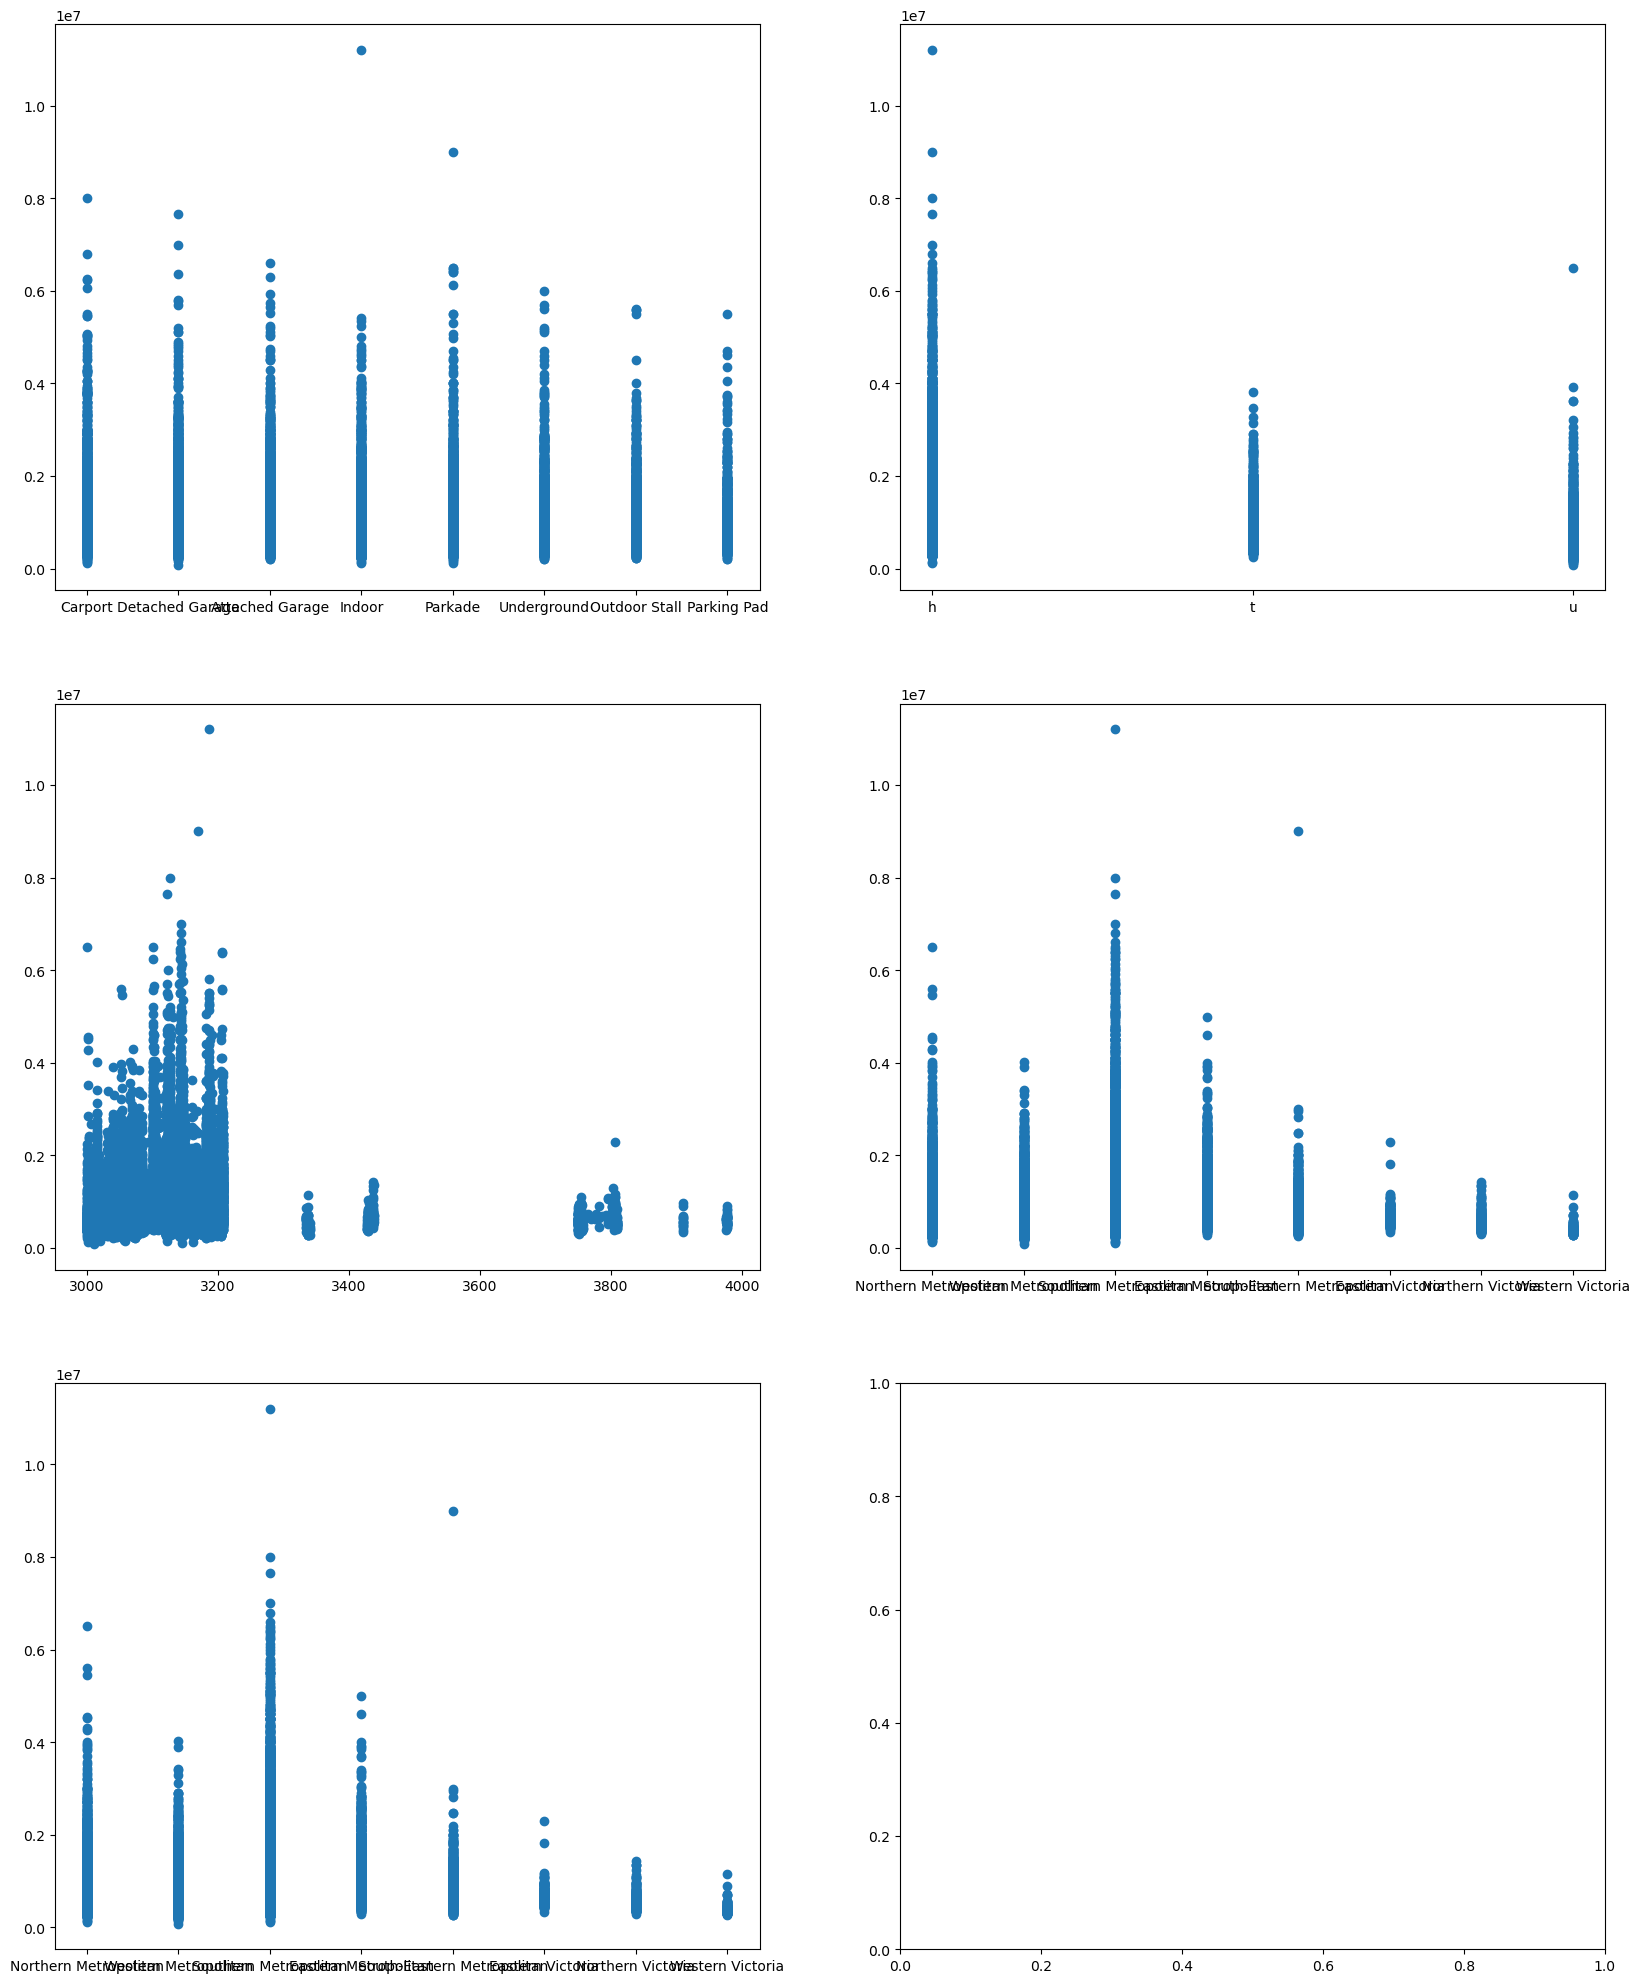

In [169]:
f, axes = plt.subplots(3,2, figsize = (20,25))

ordinal_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

axes[0,0].scatter(df['ParkingArea'],df["Price"])
axes[0,1].scatter(df['Type'],df["Price"])
axes[1,0].scatter(df['Postcode'],df["Price"])
axes[1,1].scatter(df['Regionname'],df["Price"])
axes[2,0].scatter(df['Regionname'],df["Price"])

plt.show()


Can see a few things from correlation map:
1. Weak positive correlation between price and rooms as seen.
2. Strong positive correlation between bedrooms and rooms, also bathroom and rooms.
3. Little correlation between most features.
4. Weak positive correlation between years built and distance.
5. Weak postive correlation between car and bedroom, also car and room, also car and bathroom.
6. weak negative correlation between longitude and latitude.
7. Weak negative correlation between price and years built

In [170]:
df_numeric = df[numeric_cols]
df_numeric.corr()

,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longtitude,Propertycount,Price
Rooms,1.0000,0.2715,0.0859,0.9468,0.6118,0.3939,0.0374,0.1562,-0.0127,0.0049,0.1032,-0.0717,0.4652
Distance,0.2715,1.0000,0.4816,0.2695,0.1262,0.2418,0.0609,0.0763,0.3231,-0.1004,0.2009,-0.0181,-0.2114
Postcode,0.0859,0.4816,1.0000,0.0893,0.1201,0.0679,0.0407,0.0424,0.0898,-0.2310,0.3629,0.0171,0.0449
Bedroom,0.9468,0.2695,0.0893,1.0000,0.6149,0.3885,0.0370,0.1542,-0.0020,0.0034,0.1062,-0.0535,0.4303
Bathroom,0.6118,0.1262,0.1201,0.6149,1.0000,0.3075,0.0363,0.1476,0.1680,-0.0592,0.1065,-0.0329,0.4299
Car,0.3939,0.2418,0.0679,0.3885,0.3075,1.0000,0.0378,0.1044,0.1287,-0.0090,0.0472,-0.0096,0.2018
Landsize,0.0374,0.0609,0.0407,0.0370,0.0363,0.0378,1.0000,0.3545,0.0445,0.0253,-0.0026,-0.0182,0.0327
BuildingArea,0.1562,0.0763,0.0424,0.1542,0.1476,0.1044,0.3545,1.0000,0.0678,0.0172,-0.0021,-0.0245,0.1008
YearBuilt,-0.0127,0.3231,0.0898,-0.0020,0.1680,0.1287,0.0445,0.0678,1.0000,0.0916,-0.0222,0.0224,-0.3333
Latitude,0.0049,-0.1004,-0.2310,0.0034,-0.0592,-0.0090,0.0253,0.0172,0.0916,1.0000,-0.3456,0.0111,-0.2156


Can visulatize a bit better with heatmap.

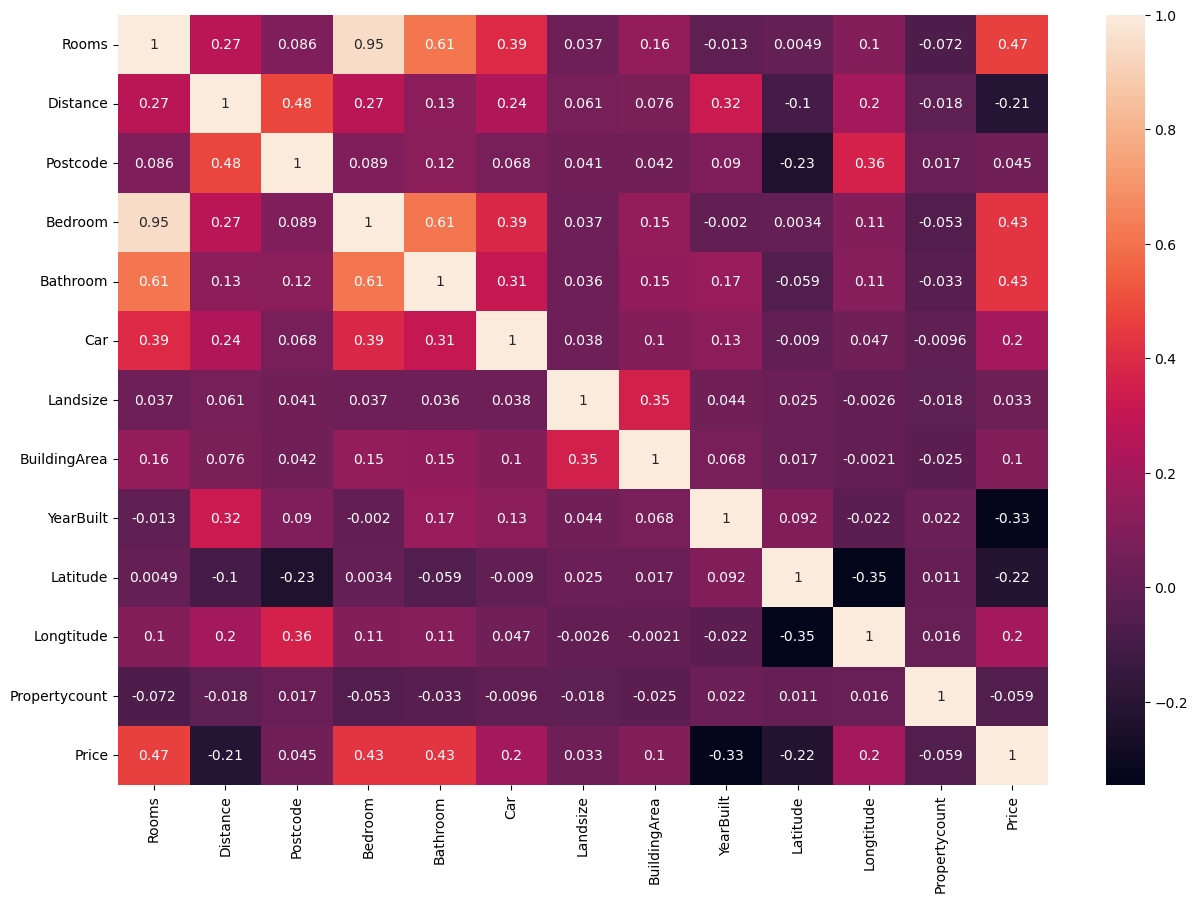

In [171]:
plt.figure(figsize=(15,10))
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

Can see a few things straight away from a quick look at the frequency tables of the categorical data:
1. There appears to be duplicates in address. Possible same house was sold multiple times during data collection.
2. Most houses appear to be type h.
3. Some sellers appear multiple times, probably realtors or property investors.
4. Need better visulation on frequency.

In [172]:
print(df.Address.value_counts(), "\n")
print(df.Type.value_counts(), "\n")

Address
5 Charles St         6
25 William St        4
33 McCracken St      3
14 Northcote St      3
1 Bruce St           3
                    ..
158 Eglinton St      1
220 Cotham Rd        1
302/108 Altona St    1
13 Albermarle St     1
42 Pascoe St         1
Name: count, Length: 34009, dtype: int64 

Type
h    23980
u     7297
t     3580
Name: count, dtype: int64 



In [173]:
print(df.CouncilArea.value_counts()[1:8], "\n")
print(df.SellerG.value_counts(), "\n")


CouncilArea
Darebin City Council          2851
Moreland City Council         2122
Glen Eira City Council        2006
Melbourne City Council        1952
Banyule City Council          1861
Moonee Valley City Council    1791
Bayside City Council          1764
Name: count, dtype: int64 

SellerG
Jellis           3359
Nelson           3236
Barry            3235
hockingstuart    2623
Marshall         2027
                 ... 
Knight              1
Allan               1
Black               1
Batty               1
Icon                1
Name: count, Length: 388, dtype: int64 



In [174]:
print(df.Regionname.value_counts(), "\n")
print(df.Method.value_counts(), "\n")

Regionname
Southern Metropolitan         11836
Northern Metropolitan          9560
Western Metropolitan           6799
Eastern Metropolitan           4377
South-Eastern Metropolitan     1739
Eastern Victoria                228
Northern Victoria               203
Western Victoria                115
Name: count, dtype: int64 

Method
S     19744
SP     5095
PI     4850
VB     3108
SN     1317
PN      308
SA      226
W       173
SS       36
Name: count, dtype: int64 



In [175]:
print(df.Postcode.value_counts(), "\n")
print(df.ParkingArea.value_counts(), "\n")

Postcode
3073.0000    844
3046.0000    638
3020.0000    617
3121.0000    612
3165.0000    583
            ... 
3770.0000      1
3428.0000      1
3139.0000      1
3786.0000      1
3793.0000      1
Name: count, Length: 211, dtype: int64 

ParkingArea
Carport            6243
Detached Garage    6243
Attached Garage    6243
Indoor             5722
Parkade            4682
Underground        2602
Outdoor Stall      2081
Parking Pad        1041
Name: count, dtype: int64 



Not going to inculde frequency of postcode, suburb, address or councilarea as can be summarized in Regionname.
1. Most houses type h as seen.
2. Most popular method was S.
3. Most houses in metropolition regions.

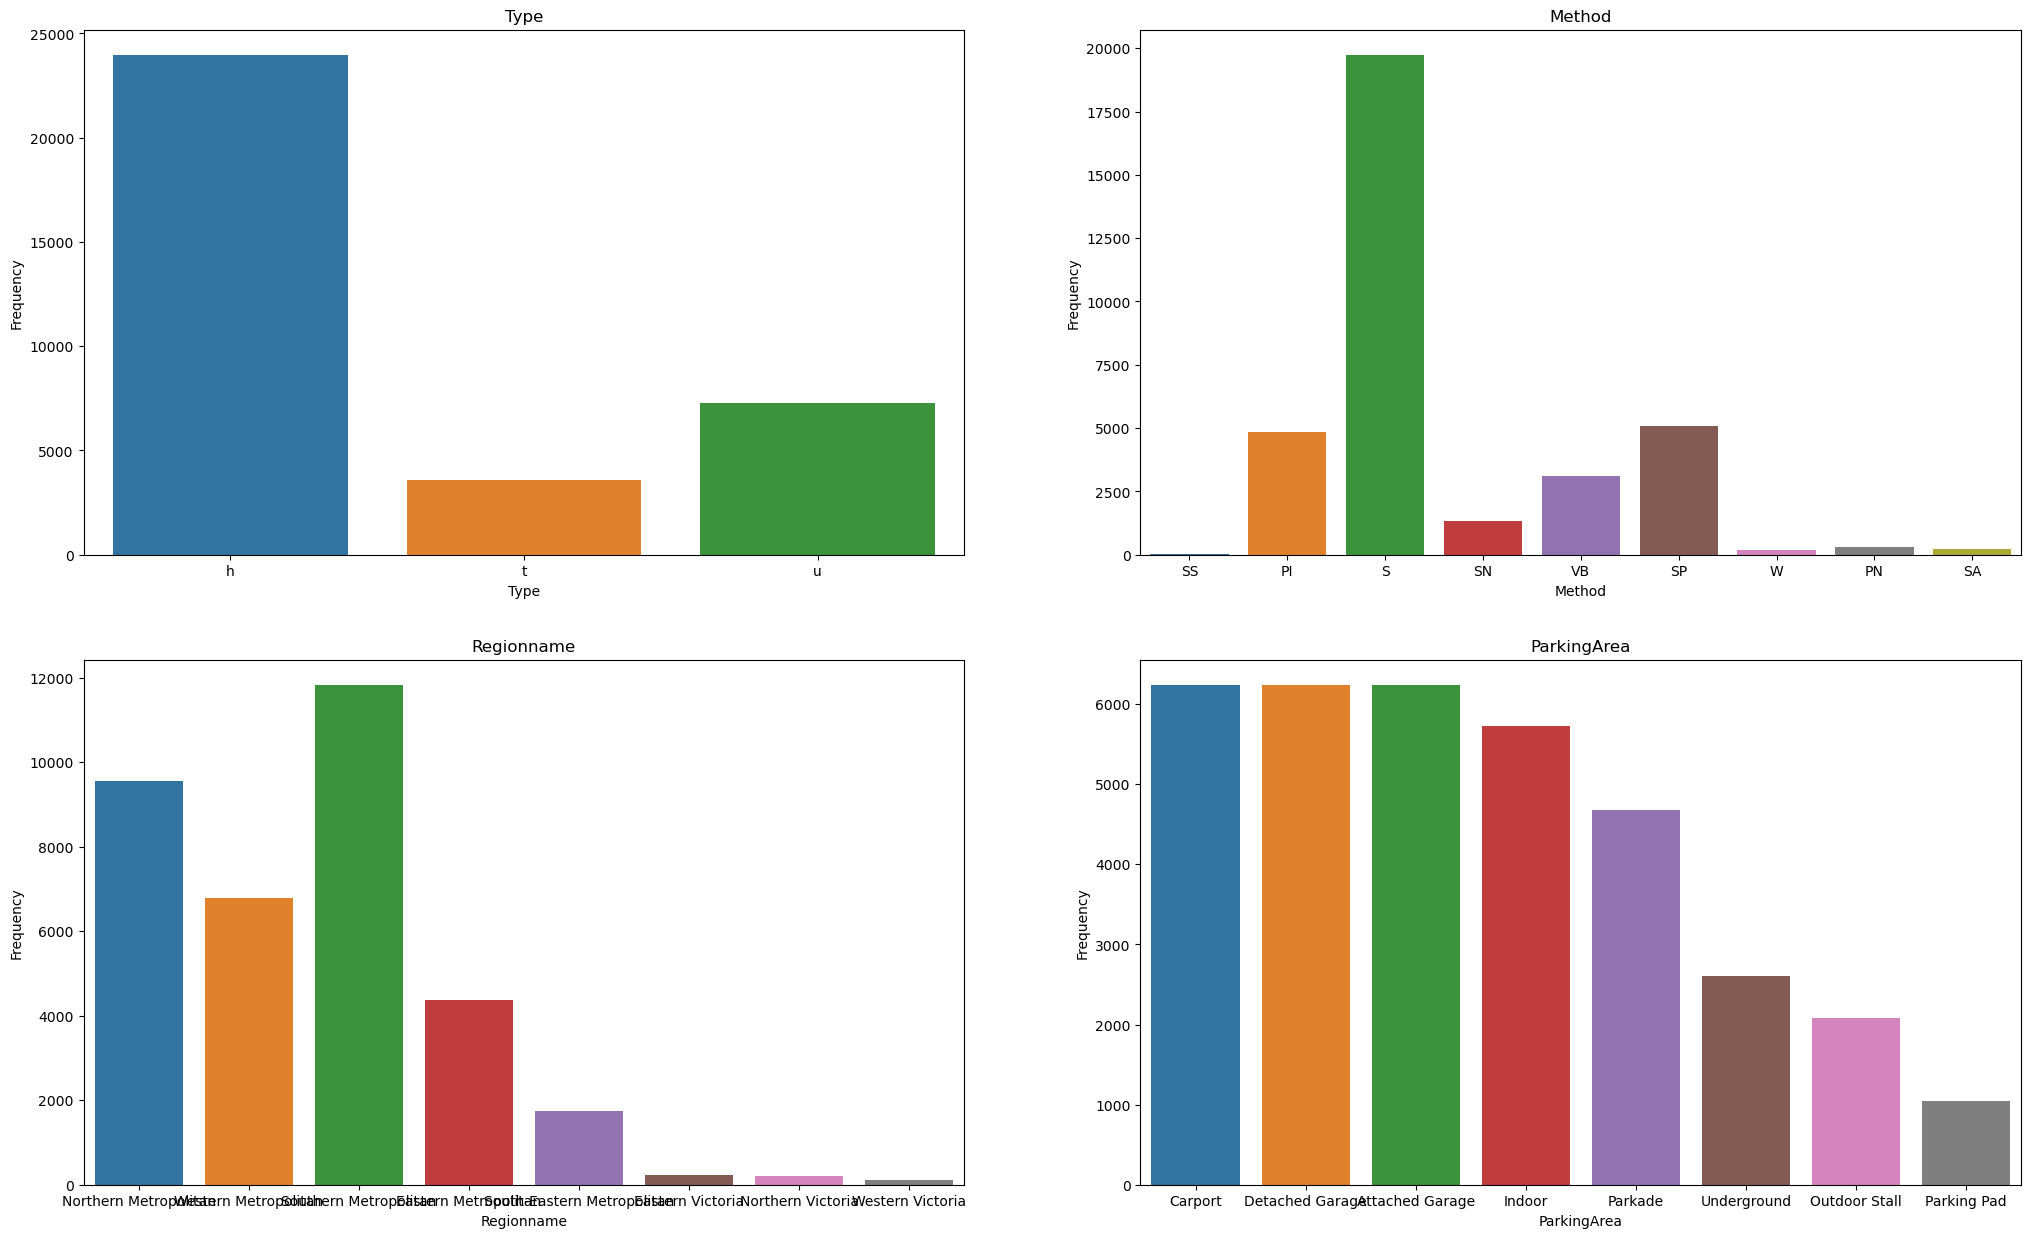

In [176]:
f, axes = plt.subplots(2,2, figsize = (25,15))

freq_cols = ['Type', 'Method', 'Regionname', 'ParkingArea']
k = 0

for i in range(0,2):
    for j in range(0,2):
        if freq_cols[k] != 'Suburb' and freq_cols[k] != 'Postcode' and freq_cols[k] != 'CouncilArea' and freq_cols[k] != 'SellerG' and freq_cols[k] != 'Address' and freq_cols[k] != 'Date':
            sns.countplot(data = df, x = freq_cols[k], ax = axes[i,j])
            axes[i,j].set_ylabel("Frequency")
            axes[i,j].set_title(freq_cols[k])
        k+=1


plt.show()

Outliers:
1. Rooms and distance look realistic. They have outliers but the data probably has no mistakes. Could remove rows with rooms greater then 6 as so few however probably better to perform windorization or data normalization on the rooms, bedroom, bathroom columns. Distance could be transformed using log do normalize its skewed distribution.
2.  The max size of bedroom is 30 which tells me theres been a mistake, especially since the max room size is only 16. On further inspection of the  boxplot can see there are only a handful of datapoints above 8. Would probably be best to remove them as they are either mistakes or such extreme cases they will skew the data.
3. There is a positive correlation between bathroom and bedroom. Bathroom only has a few outliers with more then 5 bathrooms as seen in the boxplot. As there is a correlation between bathroom and bedroom, it would probably be best to consider the remaining outliers after the bedrooms outliers get removed as mistakes. Therefore transforming the outliers to the floor of the mean of the bathroom column.
4. Very few rows with more then 6 cars coud probably remove them.
5. Landsize of 433014 must be a mistake, needs to be removed. Can see there are few above 10000km^2. Could remove them and transform the rest maybe by log function to normalize its distribution as not highly correlated to any other feature.
6. Can see buildingarea has a few 0 values which are impossible. Could treat as nan values and perform imputation or removal.
7. YearBuilt has two extreme outliers. One in 1200s, another in 2100s which must be a mistake. These are problems as not representive of the rest of the data.
8. Longitude and latitude has a lot of outliers. These columns may be removed in feature engineering process as can be better summarized in Distance column. PropertyCount has a lot of outliers with its max value.
9. Price has many outliers greater then 3 million. 

In [177]:
df.describe()

,Rooms,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longtitude,Propertycount,Price
count,34857.0000,34857,34856.0000,34856.0000,26640.0000,26631.0000,26129.0000,23047.0000,13742.0000,15551.0000,26881.0000,26881.0000,34854.0000,27247.0000
mean,3.0310,2017-05-23 11:01:38.838109696,11.1849,3116.0629,3.0846,1.6248,1.7288,593.5990,160.2564,1965.2899,-37.8106,145.0019,7572.8883,1050173.3450
min,1.0000,2016-01-28 00:00:00,0.0000,3000.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1196.0000,-38.1904,144.4238,83.0000,85000.0000
25%,2.0000,2016-11-19 00:00:00,6.4000,3051.0000,2.0000,1.0000,1.0000,224.0000,102.0000,1940.0000,-37.8629,144.9335,4385.0000,635000.0000
50%,3.0000,2017-07-08 00:00:00,10.3000,3103.0000,3.0000,2.0000,2.0000,521.0000,136.0000,1970.0000,-37.8076,145.0078,6763.0000,870000.0000
75%,4.0000,2017-10-28 00:00:00,14.0000,3156.0000,4.0000,2.0000,2.0000,670.0000,188.0000,2000.0000,-37.7541,145.0719,10412.0000,1295000.0000
max,16.0000,2018-03-17 00:00:00,48.1000,3978.0000,30.0000,12.0000,26.0000,433014.0000,44515.0000,2106.0000,-37.3902,145.5264,21650.0000,11200000.0000
std,0.9699,NaN,6.7889,109.0239,0.9807,0.7242,1.0108,3398.8419,401.2671,37.3282,0.0903,0.1202,4428.0903,641467.1301


In [178]:
print(np.percentile(df.Rooms, 99))
(df.Rooms>5).sum()

5.0


269

In [179]:
(df[df.Bedroom ==20])

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
1473,Caulfield East,5 Grange Rd,3,h,PI,Woodards,2016-08-06,9.3000,3145.0000,20.0000,1.0000,2.0000,875.0000,NaN,NaN,Glen Eira City Council,-37.8815,145.0491,Southern Metropolitan,608.0000,Parking Pad,1650000.0000


In [180]:
(df.Bathroom>5).sum()

25

In [181]:
(df.Car>6).sum()

62

In [182]:
(df.Landsize>10000).sum()

47

In [183]:
(df.BuildingArea==0).sum()

76

In [184]:
(df.Propertycount==21650.0000).sum()

844

Feature Engineering:

1. Handling missing values:
My approach to this will be seperate for the different attributes which are missing values. I will first remove the attributes with very few null values (distance, postcode, councilarea, Propertycount) will be removed. I will remove them because they are so few so too much information wont be lost. After I will replace those such as building area that are missing a large proportion. I will replace them with the median as the data is skewed. I chose median over mean because there are a lot of extreme outliers in the numerical data which will effect the mean and once they are removed the result will differ.

In [185]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Latitude          7976
Longtitude        7976
Regionname           0
Propertycount        3
ParkingArea          0
Price             7610
dtype: int64

Can see no missing data anymore.

In [186]:
df = df.dropna(subset=['Distance', 'Postcode', 'CouncilArea', 'Propertycount'])

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom          0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Latitude         0
Longtitude       0
Regionname       0
Propertycount    0
ParkingArea      0
Price            0
dtype: int64

2. Handling outliers:
Since a lot of the data is skewed or subject to extreme outliers, i will be windsorizing the extreme outliers. I will winsorize the rooms, distance, bedroom, bathroom, car, landsize, propertycount and price as these attributes are heavily skewed by outliers. I will also remove obvious mistakes such as the houses with year built in the 1200s and 2100s. Also the houses with building area greater then 1000 as these values are extreme cases or mistakes. I am removing these values instead of windsorizing them because they are probably mistakes. I will leave the longitude and latitude attributes alone because they are geographical data. I will also get rid of 0 values for building area as these make no sense.

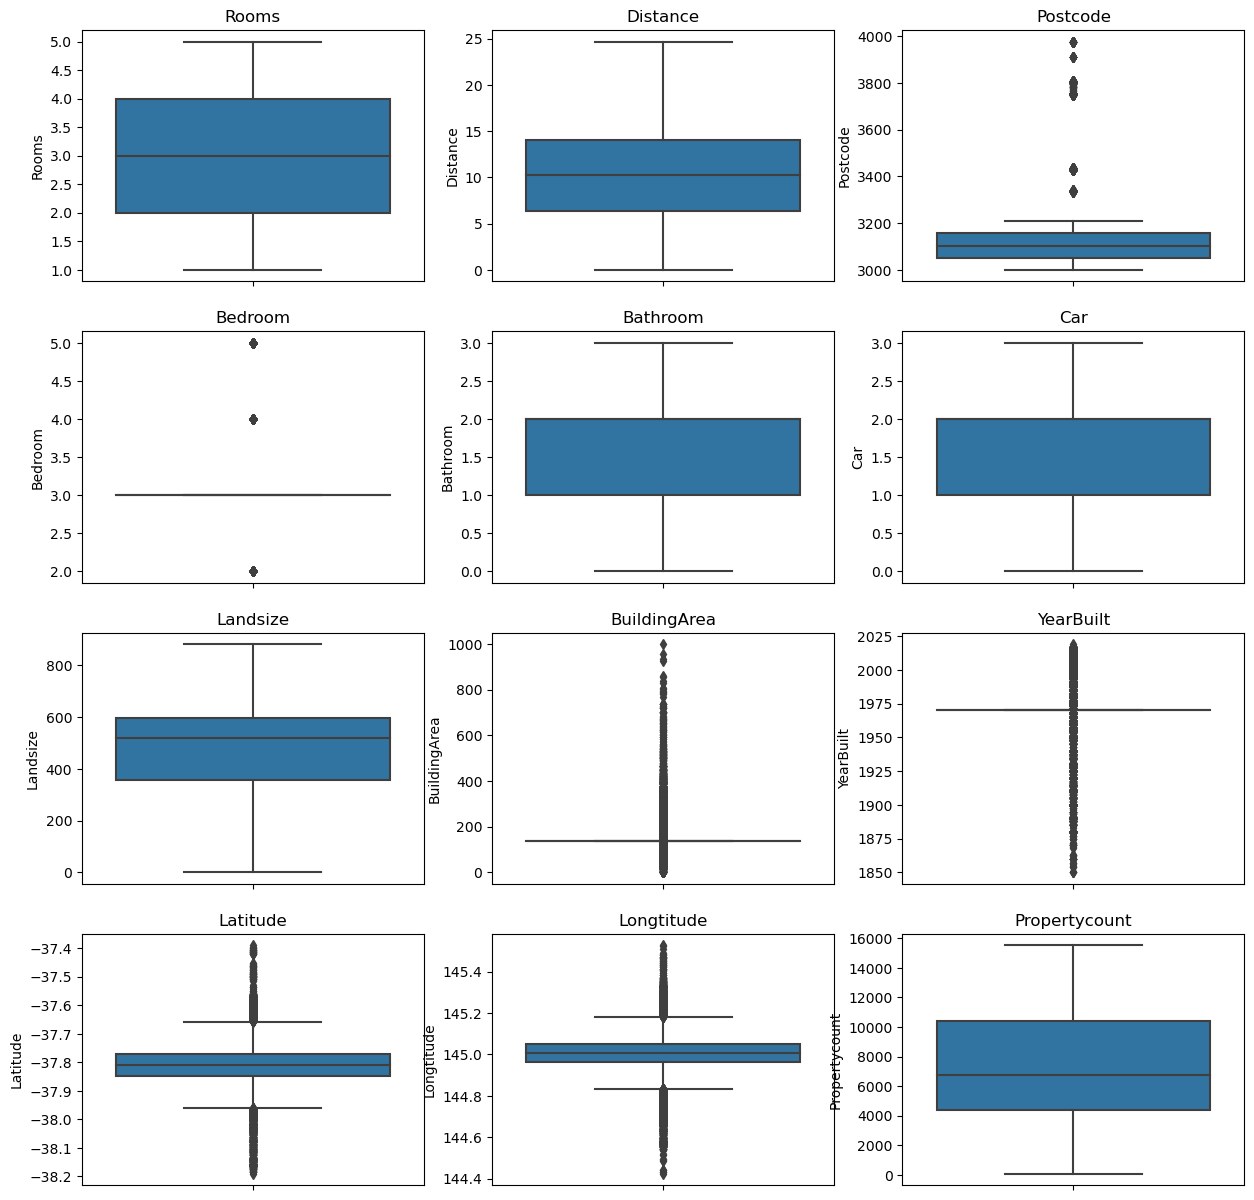

In [187]:
from scipy.stats.mstats import winsorize

df['Rooms'] = winsorize(df['Rooms'], limits=[0, 0.01])
df['Distance'] = winsorize(df['Distance'], limits=[0, 0.05])
df['Bedroom'] = winsorize(df['Bedroom'], limits=[0.05, 0.01])
df['Bathroom'] = winsorize(df['Bathroom'], limits=[0, 0.05])
df['Car'] = winsorize(df['Car'], limits=[0, 0.05])
df['Landsize'] = winsorize(df['Landsize'], limits=[0, 0.05])
df['Propertycount'] = winsorize(df['Propertycount'], limits=[0, 0.05])

df['Price'] = winsorize(df['Price'], limits=[0, 0.05])

df = df.drop(df[(df['YearBuilt'] <1850) | (df['YearBuilt'] > 2023)].index, axis=0)
df = df.drop(df[(df['BuildingArea'] >1000) | (df['BuildingArea'] ==0)].index, axis=0)

f, axes = plt.subplots(4,3, figsize = (15,15))


k = 0
for i in range(0,4):
    for j in range(0,3):
        sns.boxplot(data = df, y = numeric_cols[k], ax = axes[i,j])
        axes[i,j].set_ylabel(numeric_cols[k])
        axes[i,j].set_title(numeric_cols[k])
        k+=1


plt.show()

In [188]:
df.describe()

,Rooms,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longtitude,Propertycount,Price
count,34760.0000,34760,34760.0000,34760.0000,34760.0000,34760.0000,34760.0000,34760.0000,34760.0000,34760.0000,34760.0000,34760.0000,34760.0000,34760.0000
mean,3.0185,2017-05-23 03:58:57.031070208,10.8692,3115.9781,3.0821,1.6984,1.7331,480.3844,143.6287,1967.9228,-37.8100,145.0032,7400.1409,972780.8502
min,1.0000,2016-01-28 00:00:00,0.0000,3000.0000,2.0000,0.0000,0.0000,0.0000,0.0100,1850.0000,-38.1904,144.4238,83.0000,85000.0000
25%,2.0000,2016-11-19 00:00:00,6.4000,3051.0000,3.0000,1.0000,1.0000,357.0000,136.0000,1970.0000,-37.8469,144.9644,4385.0000,695000.0000
50%,3.0000,2017-07-01 00:00:00,10.3000,3103.0000,3.0000,2.0000,2.0000,521.0000,136.0000,1970.0000,-37.8076,145.0078,6763.0000,870000.0000
75%,4.0000,2017-10-28 00:00:00,14.0000,3156.0000,3.0000,2.0000,2.0000,598.0000,136.0000,1970.0000,-37.7709,145.0517,10412.0000,1150000.0000
max,5.0000,2018-03-17 00:00:00,24.7000,3978.0000,5.0000,3.0000,3.0000,882.0000,999.0000,2019.0000,-37.3902,145.5264,15510.0000,2055000.0000
std,0.9308,NaN,5.8229,108.8855,0.7467,0.5995,0.6843,223.2800,54.8772,24.6265,0.0791,0.1055,3986.5732,426445.7474


3. Feature Extraction/Creation:
I am going to drop the Address feature as there are too many unique values for one hot encoding and i think it could be better summarized by the regionname or suburb feature which give more information about collections of houses rather then an arbitrary address. 

In [189]:
print(f'Suburb: {len(df.Suburb.unique())},      Address: {len(df.Address.unique())}') , 
print(f'Type: {len(df.Type.unique())},          Method: {len(df.Method.unique())}'), 
print(f'SellerG: {len(df.SellerG.unique())},     Postcode: {len(df.Postcode.unique())}') , 
print(f'CouncilArea: {len(df.CouncilArea.unique())},  Regionname: {len(df.Regionname.unique())}')
print(f'ParkingArea: {len(df.ParkingArea.unique())}')  

Suburb: 349,      Address: 33917
Type: 3,          Method: 9
SellerG: 388,     Postcode: 211
CouncilArea: 33,  Regionname: 8
ParkingArea: 8


In [190]:
df = df.drop(['Address'], axis=1)

4. Encoding categorical data:
I am going to one hot encode the categorical data with few unique values such as type, method, parking area, regionname. This is when we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. This will work as these features have no clear ordering and will give the categorical data new meaning. The features with too many unique values will be target encoded. Target encoding involves replacing a categorical feature with average target value of all data points belonging to the category. It has the added benefit of being space efficient. The category_encoders package has a target encoder i can use. First need to convert the columns to categorical data and use the fit transform. The fit transform function fits the first parameter (df.Suburb for example) with an encoding of the target variable, df.Price.

In [191]:
# One hot encoding
df = pd.get_dummies(df, columns = ["Type", "Method", "ParkingArea", "Regionname"], dtype=int)

# Target Encoding
import category_encoders as ce

df["Suburb"] = df['Suburb'].astype("category")
df['SellerG'] = df['SellerG'].astype("category")
df['CouncilArea'] = df['CouncilArea'].astype("category")



df_suburb=ce.TargetEncoder().fit_transform(df['Suburb'],df['Price'])
df_seller=ce.TargetEncoder().fit_transform(df['SellerG'],df['Price'])
df_council=ce.TargetEncoder().fit_transform(df['CouncilArea'],df['Price'])

df = df_suburb.join(df.drop('Suburb',axis = 1))
df = df_seller.join(df.drop('SellerG',axis = 1))
df = df_council.join(df.drop('CouncilArea',axis = 1))

df

,CouncilArea,SellerG,Suburb,Rooms,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longtitude,Propertycount,Price,Type_h,Type_t,Type_u,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W,ParkingArea_Attached Garage,ParkingArea_Carport,ParkingArea_Detached Garage,ParkingArea_Indoor,ParkingArea_Outdoor Stall,ParkingArea_Parkade,ParkingArea_Parking Pad,ParkingArea_Underground,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,1027442.6120,1161731.1499,991766.2659,2,2016-09-03,2.5000,3067.0000,2.0000,1.0000,1.0000,126.0000,136.0000,1970.0000,-37.8014,144.9958,4019.0000,870000.0000,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1006967.4302,980604.2462,759419.9045,3,2016-09-03,13.5000,3042.0000,3.0000,2.0000,1.0000,303.0000,225.0000,2016.0000,-37.7180,144.8780,3464.0000,840000.0000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1010422.9796,902978.5631,1456912.5310,2,2016-09-03,3.3000,3206.0000,2.0000,1.0000,0.0000,120.0000,82.0000,1900.0000,-37.8459,144.9555,3280.0000,1275000.0000,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1010422.9796,801548.1200,1456912.5310,2,2016-09-03,3.3000,3206.0000,2.0000,1.0000,0.0000,159.0000,136.0000,1970.0000,-37.8450,144.9538,3280.0000,1455000.0000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,890738.9670,978679.4659,1242072.4172,3,2016-09-03,6.4000,3078.0000,3.0000,2.0000,1.0000,174.0000,122.0000,2003.0000,-37.7818,145.0198,2211.0000,870000.0000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,890738.9670,793283.2088,715982.1518,3,2017-09-30,12.0000,3073.0000,3.0000,1.0000,1.0000,521.0000,105.0000,1990.0000,-37.6977,145.0233,15510.0000,475000.0000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
34853,634282.1062,723687.7882,604805.2334,4,2017-09-30,20.6000,3064.0000,4.0000,2.0000,2.0000,521.0000,225.0000,1995.0000,-37.6367,144.9298,5833.0000,591000.0000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
34854,752362.1019,854351.2070,906630.3702,4,2017-09-30,22.2000,3172.0000,4.0000,2.0000,2.0000,534.0000,152.0000,1970.0000,-37.9704,145.1545,4054.0000,870000.0000,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
34855,752362.1019,870074.6957,906630.3702,3,2017-09-30,22.2000,3172.0000,3.0000,2.0000,1.0000,544.0000,136.0000,1970.0000,-37.9775,145.1481,4054.0000,780500.0000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


Conclusion and Recommendations:
The key findings from the data analysis were:
1. The dataset contains 34,857 rows and 22 attributes, a mix of numerical and categorical data. During the data analysis process, I noticed a significant number of missing values, especially in attributes like Bedroom, Bathroom, Car, Landsize, and BuildingArea.

2. Outliers were observed in various features, such as Rooms, Distance, Bedroom, Bathroom, Car, Landsize, PropertyCount, and Price. These outliers could potentially affect the accuracy of predictive models. Some extreme outliers were removed, and others were handled through winsorization.

3. There was some strong correlations with certain features such as bedrooms and rooms.

3. I performed a technique called winsorization to address extreme outliers in certain features. Also, I made decisions to remove data that seemed incorrect or did not fit the overall distribution.

4. I addressed the encoding of categorical data. Some attributes were one-hot encoded which is when we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns, while others with a large number of unique values were target encoded to preserve space efficiency. Target encoding involves replacing a categorical feature with average target value of all data points belonging to the category.

Recommendations:

1. Further Data Cleaning: Continue to explore the data for any other potential data quality issues, such as duplicate records or inconsistent entries. Consider normalizing or scaling target variable price.

2. Feature Selection: consider feature selection techniques to identify the most relevant attributes for predictive modeling. This step can help reduce the dimensionality of the dataset.